<a href="https://colab.research.google.com/github/sayeedafarhath/YOLOv8-for-Aerial-Vehicle-Detection/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Create target directory
!mkdir -p /content/visdrone_yolo

# Copy zips and YAML
!cp /content/drive/MyDrive/visdrone_yolo/*.zip /content/visdrone_yolo/
!cp /content/drive/MyDrive/visdrone_yolo/data.yaml /content/visdrone_yolo/

In [ ]:
%cd /content/visdrone_yolo

!unzip -q VisDrone2019-DET-train.zip
!unzip -q VisDrone2019-DET-val.zip
!unzip -q VisDrone2019-DET-test-dev.zip

# Rename for consistency
!mv VisDrone2019-DET-train train
!mv VisDrone2019-DET-val val
!mv VisDrone2019-DET-test-dev test

/content/visdrone_yolo


In [ ]:
!ls /content/visdrone_yolo

data.yaml  train  VisDrone2019-DET-test-dev.zip  VisDrone2019-DET-val.zip
test	   val	  VisDrone2019-DET-train.zip


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 89.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 72.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 97.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [ ]:
yaml_content = """
train: /content/visdrone_yolo/train/images
val: /content/visdrone_yolo/val/images
test: /content/visdrone_yolo/test/images

nc: 10
names: ['pedestrian', 'person', 'car', 'van', 'bus', 'truck', 'motor', 'bicycle', 'awning-tricycle', 'tricycle']
"""

with open('/content/visdrone_yolo/data.yaml', 'w') as f:
    f.write(yaml_content)


In [ ]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')

model.train(
    data='/content/visdrone_yolo/data.yaml',
    epochs=10,
    imgsz=640,
    batch=8,
    project='visdrone_runs',
    name='yolov8n_train',
    save=True
)

Ultralytics 8.3.153 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/visdrone_yolo/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8n_train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0

100%|██████████| 755k/755k [00:00<00:00, 23.9MB/s]

Overriding model.yaml nc=80 with nc=10

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

Model summary: 129 layers, 3,012,798 parameters, 3,012,782 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 120MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 63.1±31.7 MB/s, size: 261.9 KB)


train: Scanning /content/visdrone_yolo/train/labels... 6471 images, 0 backgrounds, 791 corrupt: 100%|██████████| 6471/6471 [00:15<00:00, 430.22it/s]

train: /content/visdrone_yolo/train/images/0000002_00005_d_0000014.jpg: ignoring corrupt image/label: Label class 10 exceeds dataset class count 10. Possible class labels are 0-9
train: /content/visdrone_yolo/train/images/0000002_00448_d_0000015.jpg: ignoring corrupt image/label: Label class 10 exceeds dataset class count 10. Possible class labels are 0-9
train: /content/visdrone_yolo/train/images/0000007_04999_d_0000036.jpg: ignoring corrupt image/label: Label class 10 exceeds dataset class count 10. Possible class labels are 0-9
train: /content/visdrone_yolo/train/images/0000007_05499_d_0000037.jpg: ignoring corrupt image/label: Label class 10 exceeds dataset class count 10. Possible class labels are 0-9
train: /content/visdrone_yolo/train/images/0000010_00569_d_0000056.jpg: ignoring corrupt image/label: Label class 10 exceeds dataset class count 10. Possible class labels are 0-9
train: /content/visdrone_yolo/train/images/0000010_05149_d_0000057.jpg: ignoring corrupt image/label: Lab

train: New cache created: /content/visdrone_yolo/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 38.1±19.0 MB/s, size: 131.6 KB)


val: Scanning /content/visdrone_yolo/val/labels... 548 images, 0 backgrounds, 29 corrupt: 100%|██████████| 548/548 [00:01<00:00, 365.10it/s]

val: /content/visdrone_yolo/val/images/0000022_00000_d_0000004.jpg: ignoring corrupt image/label: Label class 10 exceeds dataset class count 10. Possible class labels are 0-9
val: /content/visdrone_yolo/val/images/0000154_00401_d_0000001.jpg: ignoring corrupt image/label: Label class 10 exceeds dataset class count 10. Possible class labels are 0-9
val: /content/visdrone_yolo/val/images/0000162_00401_d_0000001.jpg: ignoring corrupt image/label: Label class 10 exceeds dataset class count 10. Possible class labels are 0-9
val: /content/visdrone_yolo/val/images/0000193_01876_d_0000113.jpg: ignoring corrupt image/label: Label class 10 exceeds dataset class count 10. Possible class labels are 0-9
val: /content/visdrone_yolo/val/images/0000193_02029_d_0000114.jpg: ignoring corrupt image/label: Label class 10 exceeds dataset class count 10. Possible class labels are 0-9
val: /content/visdrone_yolo/val/images/0000215_01395_d_0000259.jpg: ignoring corrupt image/label: Label class 10 exceeds data

Plotting labels to visdrone_runs/yolov8n_train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to visdrone_runs/yolov8n_train2
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      3.51G      1.818      2.314      1.047        240        640: 100%|██████████| 710/710 [02:36<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:07<00:00,  4.43it/s]


                   all        519      36451      0.338      0.162      0.132     0.0688

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      3.54G       1.68       1.59      1.007        467        640: 100%|██████████| 710/710 [02:30<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:05<00:00,  5.65it/s]


                   all        519      36451      0.222       0.19      0.157     0.0853

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      3.55G      1.643      1.474     0.9958        379        640: 100%|██████████| 710/710 [02:29<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:05<00:00,  5.56it/s]


                   all        519      36451      0.273      0.215      0.182      0.101

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      3.57G      1.605      1.392     0.9862        615        640: 100%|██████████| 710/710 [02:28<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:06<00:00,  4.84it/s]


                   all        519      36451      0.285      0.239      0.205      0.111

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      4.33G      1.568      1.319     0.9768        204        640: 100%|██████████| 710/710 [02:28<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:06<00:00,  4.83it/s]


                   all        519      36451      0.307       0.24      0.215       0.12

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      4.33G      1.555       1.28     0.9708        457        640: 100%|██████████| 710/710 [02:28<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:07<00:00,  4.43it/s]


                   all        519      36451      0.306      0.255      0.222      0.124

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      4.33G      1.524      1.233     0.9616        148        640: 100%|██████████| 710/710 [02:28<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:07<00:00,  4.50it/s]


                   all        519      36451      0.326       0.26       0.23      0.128

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      4.33G      1.513      1.212      0.957        300        640: 100%|██████████| 710/710 [02:28<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:07<00:00,  4.38it/s]


                   all        519      36451      0.331      0.261      0.234      0.133

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      5.16G       1.49      1.175     0.9535        510        640: 100%|██████████| 710/710 [02:28<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:07<00:00,  4.45it/s]


                   all        519      36451      0.326      0.266       0.24      0.136

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      5.16G      1.476      1.156      0.948        260        640: 100%|██████████| 710/710 [02:27<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:06<00:00,  5.02it/s]


                   all        519      36451      0.345      0.265      0.241      0.137

10 epochs completed in 0.436 hours.
Optimizer stripped from visdrone_runs/yolov8n_train2/weights/last.pt, 6.2MB
Optimizer stripped from visdrone_runs/yolov8n_train2/weights/best.pt, 6.2MB

Validating visdrone_runs/yolov8n_train2/weights/best.pt...
Ultralytics 8.3.153 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,007,598 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:08<00:00,  3.73it/s]


                   all        519      36451      0.343      0.266      0.241      0.137
            pedestrian        491       8415      0.365      0.273      0.255      0.104
                person        453       4792      0.439      0.164      0.192     0.0616
                   car        341       1193      0.159     0.0536     0.0368     0.0115
                   van        487      13208      0.477      0.724      0.679      0.442
                   bus        398       1861      0.373      0.272      0.268      0.182
                 truck        245        685      0.363      0.241      0.228      0.152
                 motor        314        985      0.286      0.187      0.149     0.0805
               bicycle        205        499      0.178      0.114     0.0633     0.0373
       awning-tricycle        122        236       0.49      0.309      0.307      0.215
              tricycle        458       4577      0.298       0.32      0.233     0.0846
Speed: 0.2ms preproce

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c19de8baf50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.0

In [ ]:
!ls visdrone_runs/yolov8n_train2/weights

best.pt  last.pt


In [ ]:
from ultralytics import YOLO

model = YOLO('visdrone_runs/yolov8n_train2/weights/best.pt')

In [ ]:
!ls /content/visdrone_yolo/test/images | head

0000006_00159_d_0000001.jpg
0000006_00611_d_0000002.jpg
0000006_01111_d_0000003.jpg
0000006_01275_d_0000004.jpg
0000006_01659_d_0000004.jpg
0000006_02138_d_0000006.jpg
0000006_02616_d_0000007.jpg
0000006_03636_d_0000009.jpg
0000006_04050_d_0000010.jpg
0000006_04309_d_0000011.jpg


In [ ]:
# Running inference on one image from test set
results = model.predict(source='/content/visdrone_yolo/test/images/0000006_00159_d_0000001.jpg', save=True, conf=0.25)


image 1/1 /content/visdrone_yolo/test/images/0000006_00159_d_0000001.jpg: 384x640 33 vans, 7 trucks, 40.6ms
Speed: 2.9ms preprocess, 40.6ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict


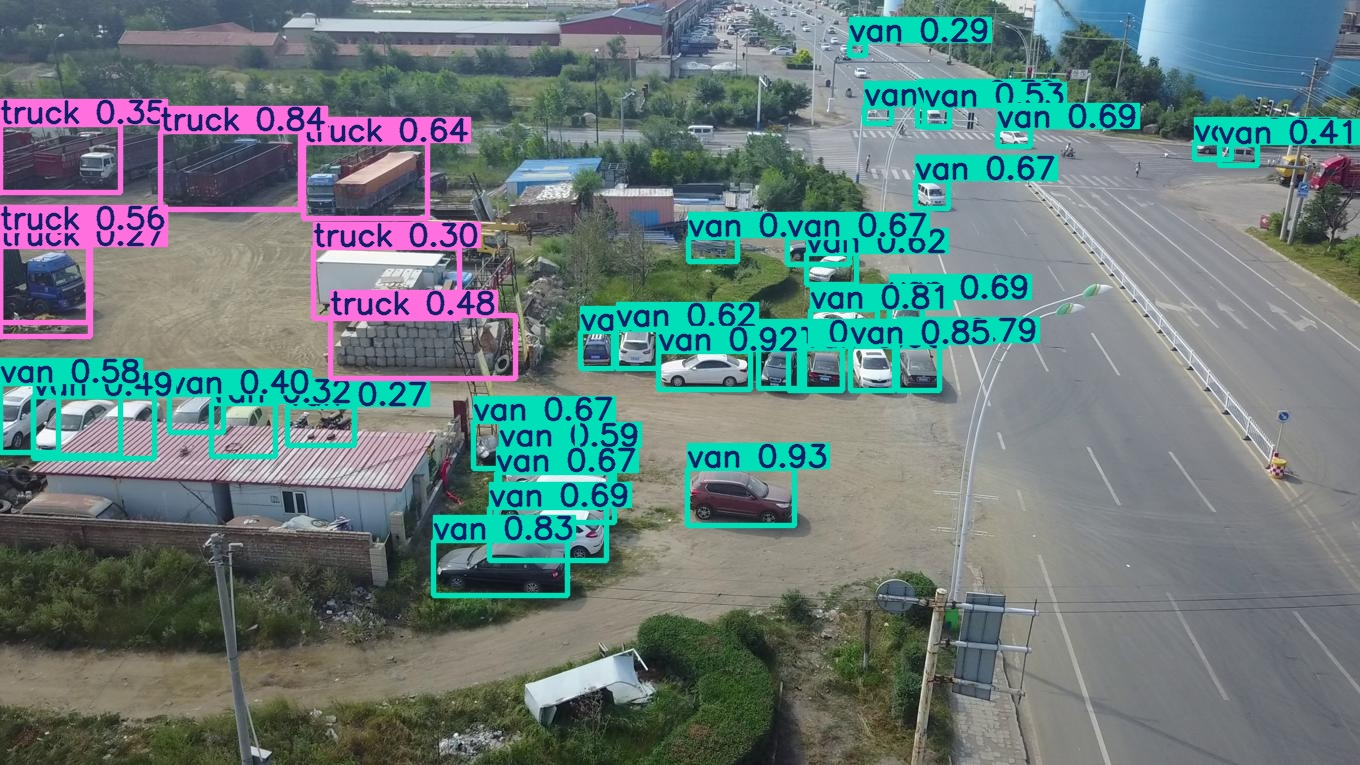

In [ ]:
from IPython.display import Image
Image(filename='runs/detect/predict/0000006_00159_d_0000001.jpg')  #filename to open and display with the detection

In [ ]:
results = model.predict(source='/content/visdrone_yolo/test/images', save=True, conf=0.25)


WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

image 1/1610 /content/visdrone_yolo/test/images/0000006_00159_d_0000001.jpg: 384x640 33 vans, 7 trucks, 8.5ms
image 2/1610 /content/visdrone_yolo/test/images/0000006_00611_d_0000002.jpg: 384x640 2 persons, 34 vans, 2 buss, 4 trucks, 5 tricycles, 7.1ms
image 3/1610 /content/visdrone_yolo/test/images/0000006_01111_d_0000003.jpg: 384x640 1 pedestrian, 12 vans, 3 trucks, 1 tricycle, 9.2ms
image 4/1610 /content/visdrone_yolo/test/images/0000006_01275_d_0000

In [ ]:
# Zip predictions
!zip -r visdrone_predictions.zip runs/detect/predict/

# Then download
from google.colab import files
files.download("visdrone_predictions.zip")

  adding: runs/detect/predict/ (stored 0%)
  adding: runs/detect/predict/0000353_02000_d_0000192.jpg (deflated 3%)
  adding: runs/detect/predict/0000011_06595_d_0000010.jpg (deflated 3%)
  adding: runs/detect/predict/0000265_04500_d_0000010.jpg (deflated 3%)
  adding: runs/detect/predict/9999973_00000_d_0000056.jpg (deflated 6%)
  adding: runs/detect/predict/9999938_00000_d_0000070.jpg (deflated 5%)
  adding: runs/detect/predict/0000265_05000_d_0000011.jpg (deflated 2%)
  adding: runs/detect/predict/9999996_00000_d_0000026.jpg (deflated 10%)
  adding: runs/detect/predict/0000353_04500_d_0000197.jpg (deflated 3%)
  adding: runs/detect/predict/9999938_00000_d_0000416.jpg (deflated 5%)
  adding: runs/detect/predict/9999938_00000_d_0000285.jpg (deflated 5%)
  adding: runs/detect/predict/9999973_00000_d_0000125.jpg (deflated 4%)
  adding: runs/detect/predict/9999952_00000_d_0000197.jpg (deflated 3%)
  adding: runs/detect/predict/9999996_00000_d_0000028.jpg (deflated 7%)
  adding: runs/detec

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from ultralytics import YOLO

# Loading trained model
model = YOLO('visdrone_runs/yolov8n_train2/weights/best.pt')

# Evaluating performance on validation set (val images and labels defined in data.yaml)
metrics = model.val(data='/content/visdrone_yolo/data.yaml')

Ultralytics 8.3.153 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,007,598 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1757.7±634.3 MB/s, size: 98.7 KB)


val: Scanning /content/visdrone_yolo/val/labels.cache... 548 images, 0 backgrounds, 29 corrupt: 100%|██████████| 548/548 [00:00<?, ?it/s]

val: /content/visdrone_yolo/val/images/0000022_00000_d_0000004.jpg: ignoring corrupt image/label: Label class 10 exceeds dataset class count 10. Possible class labels are 0-9
val: /content/visdrone_yolo/val/images/0000154_00401_d_0000001.jpg: ignoring corrupt image/label: Label class 10 exceeds dataset class count 10. Possible class labels are 0-9
val: /content/visdrone_yolo/val/images/0000162_00401_d_0000001.jpg: ignoring corrupt image/label: Label class 10 exceeds dataset class count 10. Possible class labels are 0-9
val: /content/visdrone_yolo/val/images/0000193_01876_d_0000113.jpg: ignoring corrupt image/label: Label class 10 exceeds dataset class count 10. Possible class labels are 0-9
val: /content/visdrone_yolo/val/images/0000193_02029_d_0000114.jpg: ignoring corrupt image/label: Label class 10 exceeds dataset class count 10. Possible class labels are 0-9
val: /content/visdrone_yolo/val/images/0000215_01395_d_0000259.jpg: ignoring corrupt image/label: Label class 10 exceeds data


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:10<00:00,  3.07it/s]


                   all        519      36451      0.342      0.267      0.241      0.137
            pedestrian        491       8415      0.367      0.275      0.256      0.105
                person        453       4792      0.436      0.164      0.191     0.0618
                   car        341       1193      0.159     0.0545     0.0366     0.0116
                   van        487      13208      0.477      0.724      0.679      0.443
                   bus        398       1861      0.372      0.274      0.268      0.182
                 truck        245        685      0.365      0.245      0.228      0.153
                 motor        314        985      0.284      0.188      0.149     0.0807
               bicycle        205        499      0.178      0.116     0.0632     0.0371
       awning-tricycle        122        236      0.484       0.31      0.308      0.215
              tricycle        458       4577      0.299      0.322      0.235     0.0847
Speed: 0.7ms preproce

In [ ]:
print("Precision:", metrics.box.p)
print("Recall:", metrics.box.r)
print("mAP@0.5:", metrics.box.map50)
print("mAP@0.5:0.95:", metrics.box.map)

Precision: [    0.36697     0.43613     0.15924      0.4766     0.37152     0.36502       0.284     0.17816     0.48366     0.29941]
Recall: [    0.27475     0.16402    0.054484     0.72411     0.27351     0.24526     0.18782     0.11623     0.30959     0.32226]
mAP@0.5: 0.241382338412022
mAP@0.5:0.95: 0.13734391516364117


In [ ]:
!ls runs/detect/val2
!ls runs/detect/val2/

confusion_matrix_normalized.png  PR_curve.png		val_batch1_labels.jpg
confusion_matrix.png		 R_curve.png		val_batch1_pred.jpg
F1_curve.png			 val_batch0_labels.jpg	val_batch2_labels.jpg
P_curve.png			 val_batch0_pred.jpg	val_batch2_pred.jpg
confusion_matrix_normalized.png  PR_curve.png		val_batch1_labels.jpg
confusion_matrix.png		 R_curve.png		val_batch1_pred.jpg
F1_curve.png			 val_batch0_labels.jpg	val_batch2_labels.jpg
P_curve.png			 val_batch0_pred.jpg	val_batch2_pred.jpg


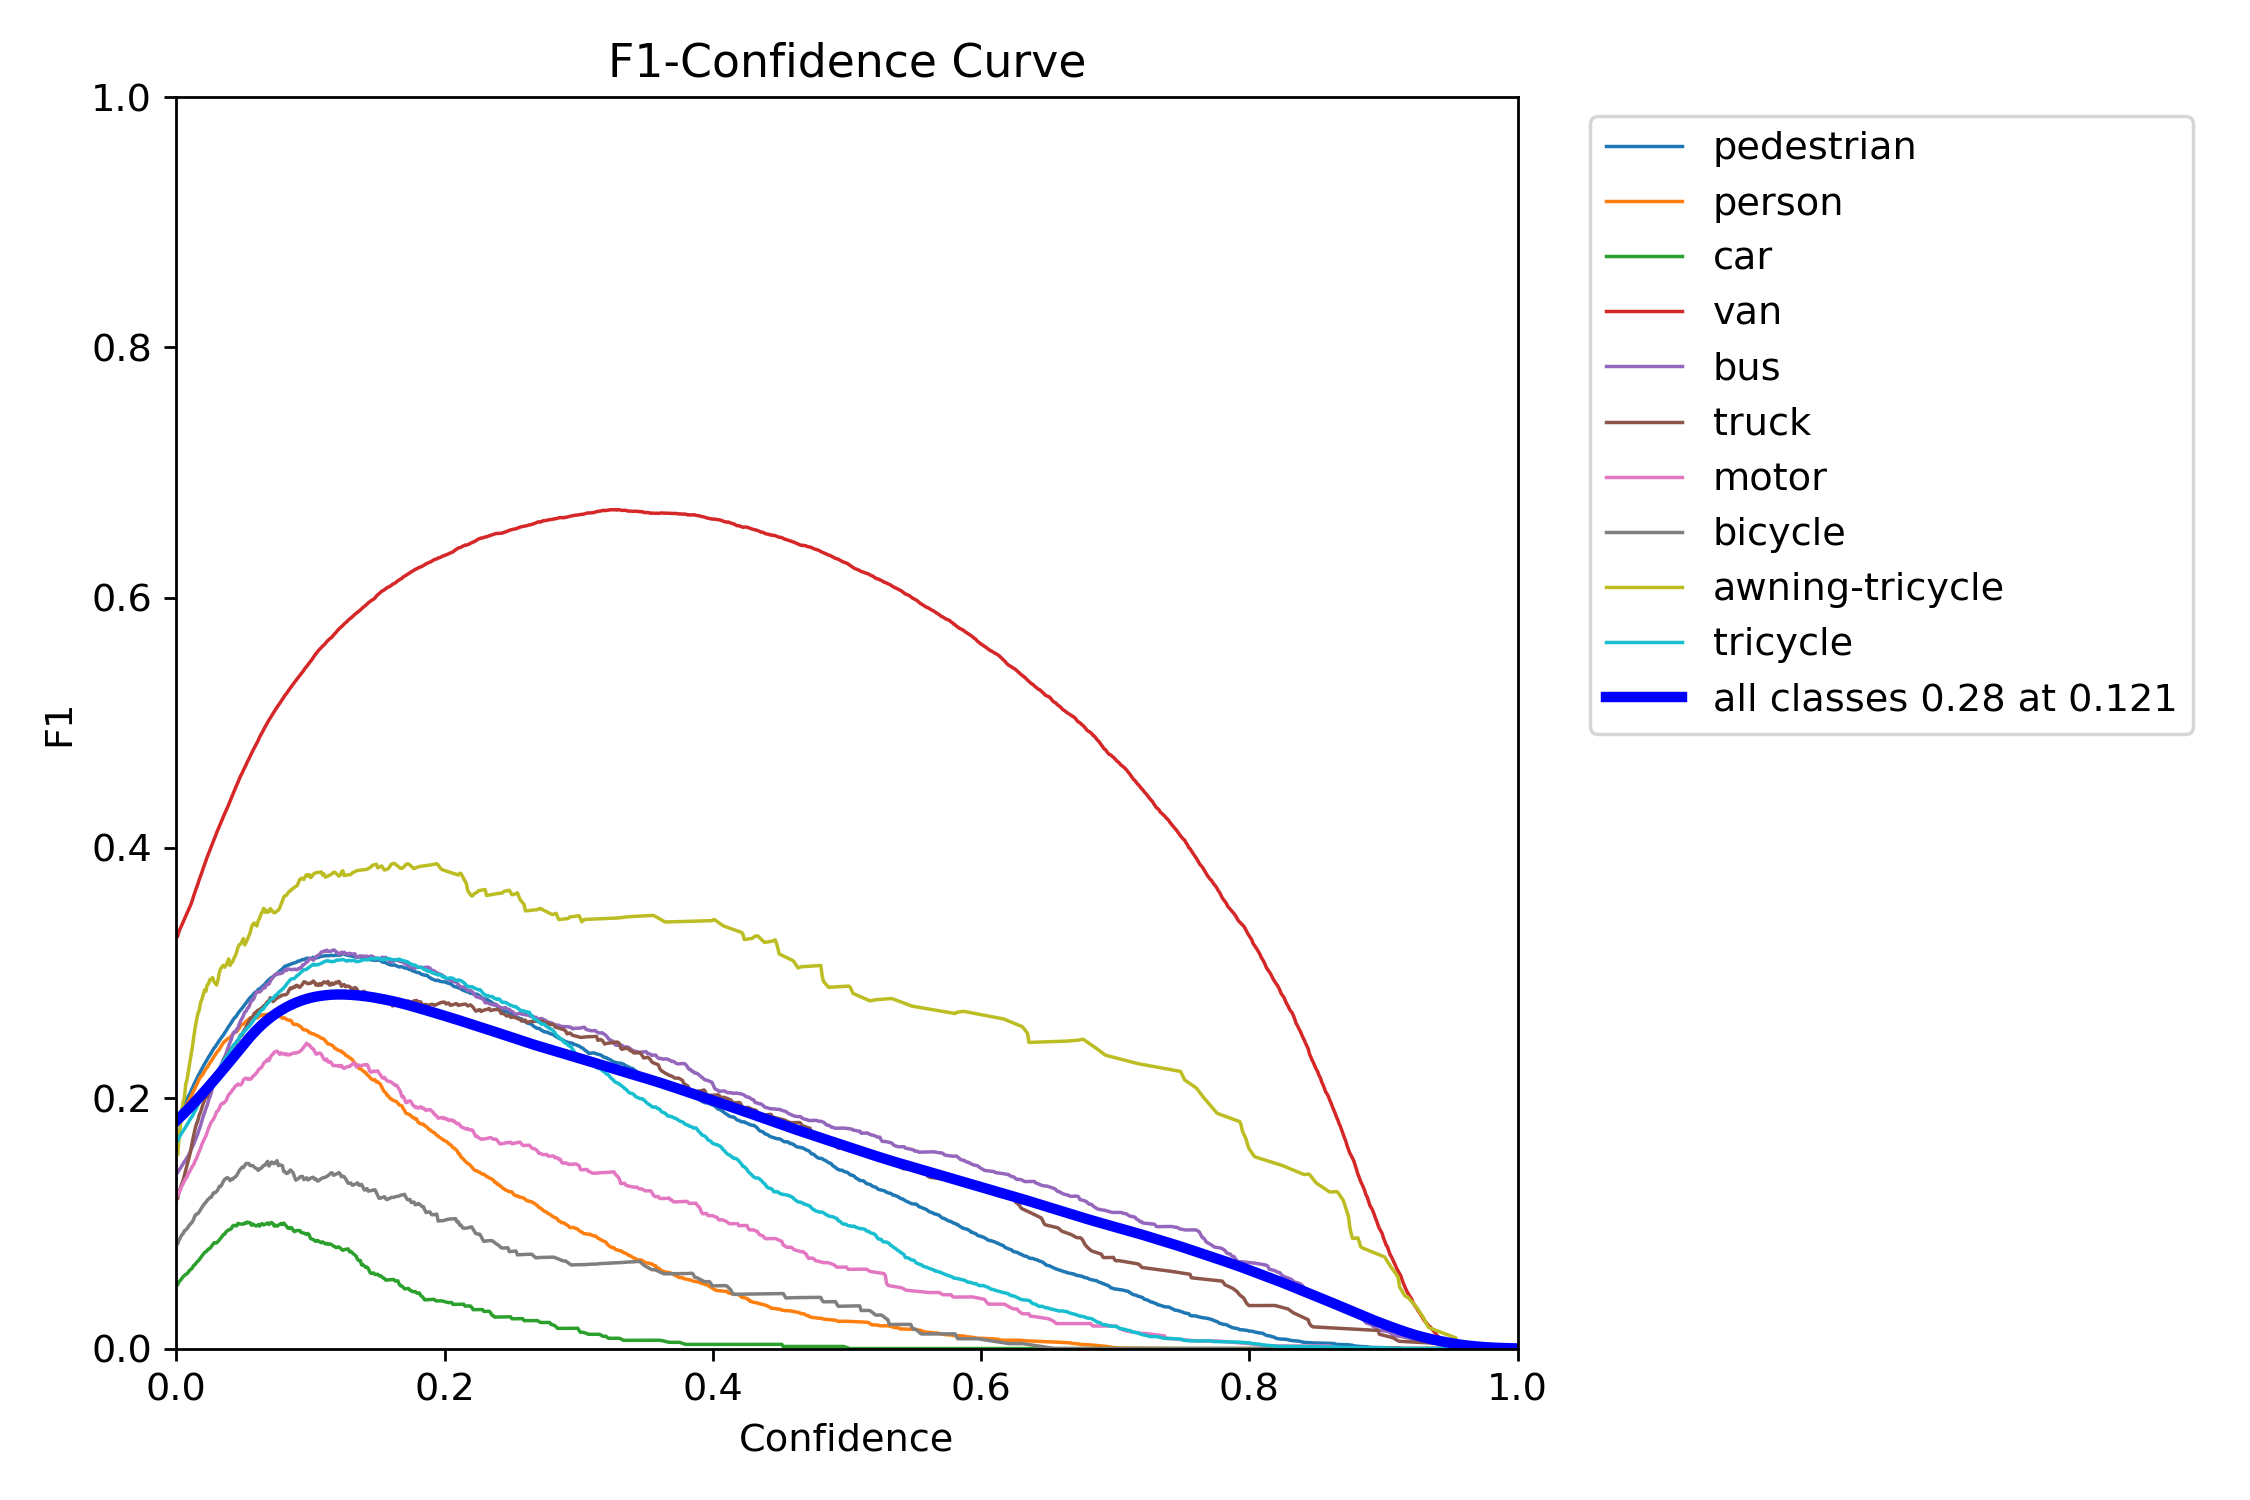

In [ ]:
from IPython.display import Image

# Replace filenames if they differ
Image(filename='runs/detect/val2/confusion_matrix.png')
Image(filename='runs/detect/val2/PR_curve.png')
Image(filename='runs/detect/val2/F1_curve.png')

In [ ]:
!ls runs/detect/val2

confusion_matrix_normalized.png  PR_curve.png		val_batch1_labels.jpg
confusion_matrix.png		 R_curve.png		val_batch1_pred.jpg
F1_curve.png			 val_batch0_labels.jpg	val_batch2_labels.jpg
P_curve.png			 val_batch0_pred.jpg	val_batch2_pred.jpg


In [ ]:
#trial single image download
from google.colab import files

# Replace with the file name you actually see in your output
files.download('runs/detect/val2/P_curve.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#entire zip results directory download
!zip -r val_results.zip runs/detect/val2
files.download("val_results.zip")

  adding: runs/detect/val2/ (stored 0%)
  adding: runs/detect/val2/confusion_matrix.png (deflated 15%)
  adding: runs/detect/val2/PR_curve.png (deflated 7%)
  adding: runs/detect/val2/val_batch2_labels.jpg (deflated 5%)
  adding: runs/detect/val2/val_batch2_pred.jpg (deflated 4%)
  adding: runs/detect/val2/P_curve.png (deflated 4%)
  adding: runs/detect/val2/val_batch0_pred.jpg (deflated 4%)
  adding: runs/detect/val2/F1_curve.png (deflated 9%)
  adding: runs/detect/val2/confusion_matrix_normalized.png (deflated 15%)
  adding: runs/detect/val2/val_batch1_labels.jpg (deflated 4%)
  adding: runs/detect/val2/val_batch1_pred.jpg (deflated 4%)
  adding: runs/detect/val2/R_curve.png (deflated 9%)
  adding: runs/detect/val2/val_batch0_labels.jpg (deflated 4%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
metrics_test = model.val(data='/content/visdrone_yolo/data.yaml', split='test')

Ultralytics 8.3.153 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 57.8±21.1 MB/s, size: 241.5 KB)


val: Scanning /content/visdrone_yolo/test/labels... 1610 images, 0 backgrounds, 146 corrupt: 100%|██████████| 1610/1610 [00:03<00:00, 459.72it/s]

val: /content/visdrone_yolo/test/images/0000006_00159_d_0000001.jpg: ignoring corrupt image/label: Label class 10 exceeds dataset class count 10. Possible class labels are 0-9
val: /content/visdrone_yolo/test/images/0000006_00611_d_0000002.jpg: ignoring corrupt image/label: Label class 10 exceeds dataset class count 10. Possible class labels are 0-9
val: /content/visdrone_yolo/test/images/0000006_05168_d_0000013.jpg: ignoring corrupt image/label: Label class 10 exceeds dataset class count 10. Possible class labels are 0-9
val: /content/visdrone_yolo/test/images/0000006_05999_d_0000017.jpg: ignoring corrupt image/label: Label class 10 exceeds dataset class count 10. Possible class labels are 0-9
val: /content/visdrone_yolo/test/images/0000006_06773_d_0000018.jpg: ignoring corrupt image/label: Label class 10 exceeds dataset class count 10. Possible class labels are 0-9
val: /content/visdrone_yolo/test/images/0000063_10000_d_0000011.jpg: ignoring corrupt image/label: Label class 10 exceed


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 92/92 [00:26<00:00,  3.50it/s]


                   all       1464      68051      0.311      0.242      0.209      0.117
            pedestrian       1078      19430      0.378      0.159      0.166     0.0652
                person        709       5656      0.337     0.0546     0.0712      0.022
                   car        317       1127       0.16      0.039     0.0408     0.0142
                   van       1387      25442      0.476      0.652      0.599      0.352
                   bus       1059       5297      0.293      0.286       0.23      0.141
                 truck        664       2362      0.318      0.314      0.243      0.141
                 motor        201        423      0.135      0.142     0.0694     0.0366
               bicycle        199        530      0.269      0.113     0.0854     0.0452
       awning-tricycle        776       2809      0.488      0.453      0.444      0.298
              tricycle        698       4975      0.251      0.207      0.139     0.0504
Speed: 0.5ms preproce

In [ ]:
#dowloading the results
!zip -r val3_results.zip runs/detect/val3
from google.colab import files
files.download("val3_results.zip")


  adding: runs/detect/val3/ (stored 0%)
  adding: runs/detect/val3/confusion_matrix.png (deflated 15%)
  adding: runs/detect/val3/PR_curve.png (deflated 6%)
  adding: runs/detect/val3/val_batch2_labels.jpg (deflated 4%)
  adding: runs/detect/val3/val_batch2_pred.jpg (deflated 4%)
  adding: runs/detect/val3/P_curve.png (deflated 4%)
  adding: runs/detect/val3/val_batch0_pred.jpg (deflated 4%)
  adding: runs/detect/val3/F1_curve.png (deflated 9%)
  adding: runs/detect/val3/confusion_matrix_normalized.png (deflated 16%)
  adding: runs/detect/val3/val_batch1_labels.jpg (deflated 4%)
  adding: runs/detect/val3/val_batch1_pred.jpg (deflated 4%)
  adding: runs/detect/val3/R_curve.png (deflated 9%)
  adding: runs/detect/val3/val_batch0_labels.jpg (deflated 4%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print(metrics_test)

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c19de1aa1d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.0